# Title:Air Quality Forecasting

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt



## Data Understanding



In [2]:
#reading the dataset
df = pd.read_csv('data.csv', index_col=0)
df.head()   

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng



Our dataset is obtained from __[UC Irvine ML Repository](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data)__ . This data has values recorded hourly from air quality monitoring sites.<br>

The data set covers the time span from March 1st, 2013, to February 28th, 2017. The following presents details for each feature/column : <br>

- `No`: row number
- `year`: year of data in this row
- `month`: month of data in this row
- `day`: day of data in this row
- `hour`: hour of data in this row
- `PM2.5`: PM2.5 concentration (ug/m^3)
- `PM10`: PM10 concentration (ug/m^3)
- `SO2`: SO2 concentration (ug/m^3)
- `NO2`: NO2 concentration (ug/m^3)
- `CO`: CO concentration (ug/m^3)
- `O3`: O3 concentration (ug/m^3)
- `TEMP`: temperature (degree Celsius)
- `PRES`: pressure (hPa)
- `DEWP`: dew point temperature (degree Celsius)
- `RAIN`: precipitation (mm)
- `wd`: wind direction
- `WSPM`: wind speed (m/s)
- `station`: name of the air-quality monitoring site <br>


Throughout this project, our attention will be solely directed to the `PM2.5 `feature. PM2.5 stands for particles with a diameter smaller than 2.5 micrometers, which is over 10 times thinner than a human hair—quite intriguing, isn't it? These particles emerge from burning fuel and chemical reactions in the atmosphere, be it coal in a power plant or gasoline in your car. Remarkably tiny, they have the potential to penetrate deep into the lungs and bloodstream, posing a gradual threat to your body over time.

Analyzing the PM2.5 column is crucial due to its significant impact on public health and environmental quality. PM2.5, or fine particulate matter, is known for its ability to penetrate deep into the respiratory tract, leading to a wide array of health issues ranging from respiratory infections to more severe conditions like heart disease and lung cancer. This makes it one of the most important indicators of air quality and a key factor in assessing environmental health risks. Furthermore, PM2.5 is a product of various sources, including industrial emissions, vehicular exhaust, and natural phenomena, making it a comprehensive metric for understanding air pollution's underlying causes and effects. By focusing our analysis on PM2.5, we can gain critical insights into the air quality trends, identify potential health risks, and develop targeted strategies for pollution control and mitigation, thereby directly contributing to the improvement of public health and environmental sustainability.

In [3]:
df['PM2.5'].describe() #describing the column PM2.5

count    34418.000000
mean        83.852089
std         82.796445
min          2.000000
25%         24.000000
50%         60.000000
75%        115.750000
max        770.000000
Name: PM2.5, dtype: float64

## Insights from Column `PM2.5`  Analysis

We have delved into the `PM2.5` particulate matter data, which is crucial due to its significant impact on air quality and public health. Here are some intriguing insights:

- **Central Tendency and Spread**:
  - The **average PM2.5 level** is intriguingly high, indicating prevalent air pollution concerns.
  - A **broad range** in PM2.5 levels, as reflected in the standard deviation, hints at varying air quality, possibly influenced by factors like weather, urban activities, or seasonal changes.

- **Data Extremes**:
  - The **maximum PM2.5 level** is alarmingly high, pointing towards episodes of potentially hazardous air quality. These peaks might correlate with specific events or conditions worth investigating further.
  - The **minimum value**, though significantly lower, is not zero – an indicator that air pollution is a consistent concern.

- **Quartile Analysis**:
  - The **interquartile range** reveals that half of the PM2.5 values fall within a specific band. This range is a key indicator of typical pollution levels, providing a focused window into the most common air quality scenarios.

- **Public Health Implications**:
  - Given that even low concentrations of PM2.5 can have health impacts, the observed levels highlight the importance of continuous monitoring and proactive measures for air quality improvement.

- **Potential for Further Analysis**:
  - These statistics pave the way for deeper analysis, such as examining trends over time, assessing the impact of environmental policies, and identifying the primary contributors to PM2.5 levels.

This statistical overview not only sheds light on the current state of air quality but also underscores the significance of PM2.5 as a critical environmental health indicator.


## Data Cleaning

In [4]:
#checking for null values
df.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [5]:
#Perform forward filling of missing values
df = df.ffill()

In [6]:
df.isna().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

In [7]:
# Drop unnecessary columns
df = df.drop(['NO2'], axis=1)

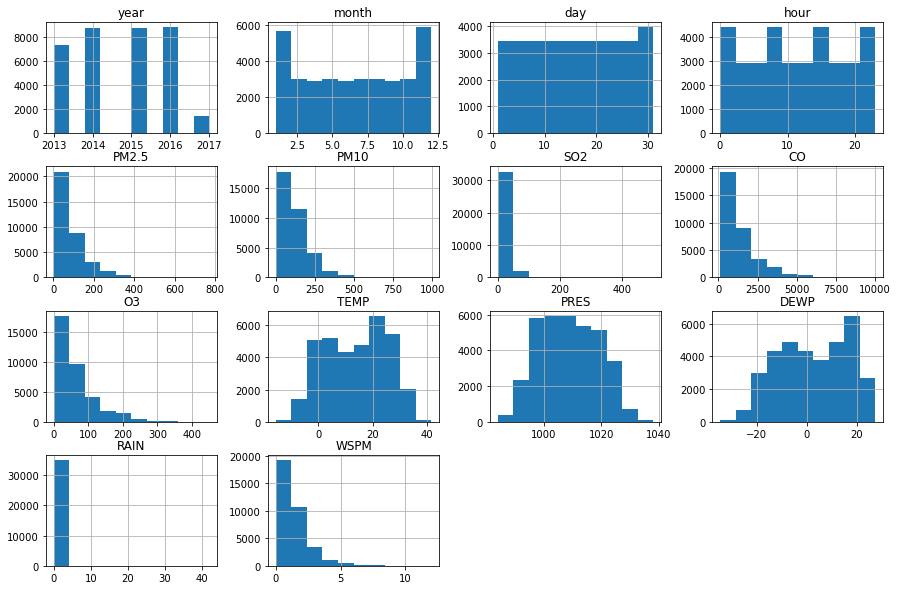

In [8]:
#histogram for numerical columns
df.hist(figsize=(15,10))
plt.show()

In [9]:
#Investigating only time and the column PM2.5

df1 = pd.to_datetime(df[["year", "month", "day", "hour"]])
data = pd.concat([df1, df['PM2.5']], axis = 1)
data = data.rename(columns = {0: "Time", 'PM2.5': 'PM2.5'})
data.set_index('Time', inplace = True)
data.head()

,PM2.5
Time,
2013-03-01 00:00:00,6.0
2013-03-01 01:00:00,6.0
2013-03-01 02:00:00,5.0
2013-03-01 03:00:00,6.0
2013-03-01 04:00:00,5.0


In [10]:
#Check to see the number of missing values
data.isna().sum()

PM2.5    0
dtype: int64

In [12]:
data.describe()

,PM2.5
count,35064.000000
mean,84.345203
std,83.228885
min,2.000000
25%,24.000000
50%,60.000000
75%,116.000000
max,770.000000


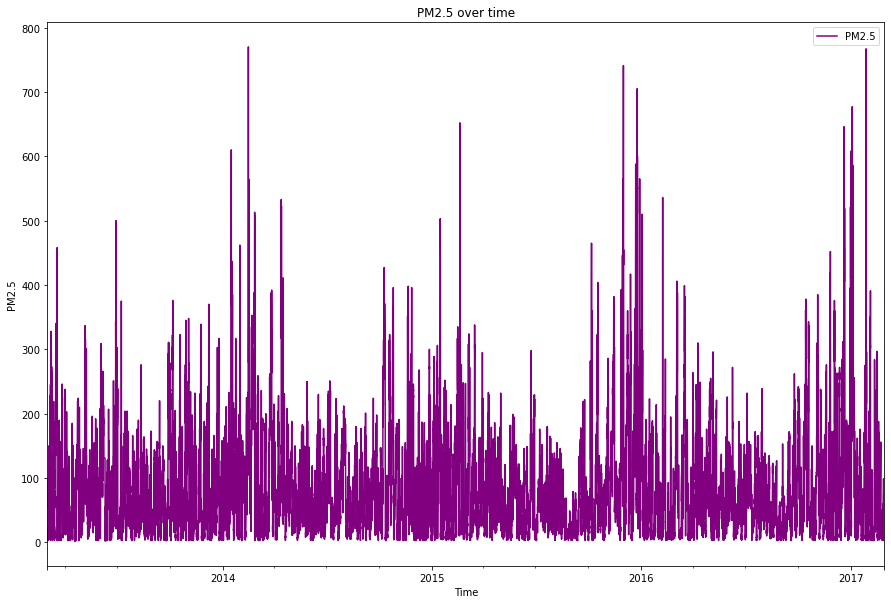

In [ ]:
data.plot(figsize=(15,10), color = 'purple')
plt.ylabel('PM2.5')
plt.title('PM2.5 over time')
plt.show()

Let's explore the peaks in our dataset by examining the timestamps of the highest values:


In [14]:
data.sort_values(by = 'PM2.5', ascending = False).head(25)


,PM2.5
Time,
2014-02-14 22:00:00,770.0
2017-01-28 02:00:00,767.0
2015-12-01 13:00:00,741.0
2017-01-28 01:00:00,739.0
2015-12-01 12:00:00,733.0
2015-12-25 11:00:00,705.0
2015-12-25 12:00:00,705.0
2015-12-25 13:00:00,680.0
2017-01-04 00:00:00,677.0


**Conclusion**: Majority of highest values recorded occur during the months of December to February. Could this speculate high pollution during Winter?

To find any probabilty of a trend/seasonality, lets break down the data by plotting and tracing any patterns .

In [15]:
dataH = data.resample('D').mean()

In [16]:
def index_scale(plotnumber, data):
    """Plot Index Scale.
    
    Takes in a dataset to graph the PM2.5 scale on graph for comparison.
    
    Args:
        plotnumber: Corresponding plot number in the subplots of the graph.
        data: A dataframe of the the time window we want to graph.
    
    Returns: 
        A subplot of the data along with the PM2.5 scale on the graph for comparison.
    """
    axs[plotnumber].fill_between(x = data, y1 = 0, y2 = 12, alpha = 0.9, label = 'Good', color = 'g')
    axs[plotnumber].fill_between(x = data, y1 = 12.1, y2 = 35.4, label = 'Moderate', color = 'y')
    axs[plotnumber].fill_between(x = data, y1 = 35.5, y2 = 55.4, label = 'Unhealthy For Sensitive Group', color = 'orange')
    axs[plotnumber].fill_between(x = data, y1 = 55.5, y2 = 150.4, alpha = 0.7, label = 'Unhealthy', color = 'r')
    axs[plotnumber].fill_between(x = data, y1 = 150.5, y2 = 250.4, alpha = 0.7, label = 'Very Unhealthy', color = 'darkred')
    axs[plotnumber].fill_between(x = data, y1 = 250.5, y2 = 500.4, alpha = 0.4, label = 'Hazardous', color = 'black')
    axs[plotnumber].legend(loc = 'upper left', framealpha = 0.5)
    axs[plotnumber].set_xlabel('Year ' + data[0].strftime('%Y') + ' - Year ' + data[-1].strftime('%Y'))
    axs[plotnumber].set_ylabel('PM2.5 Index')

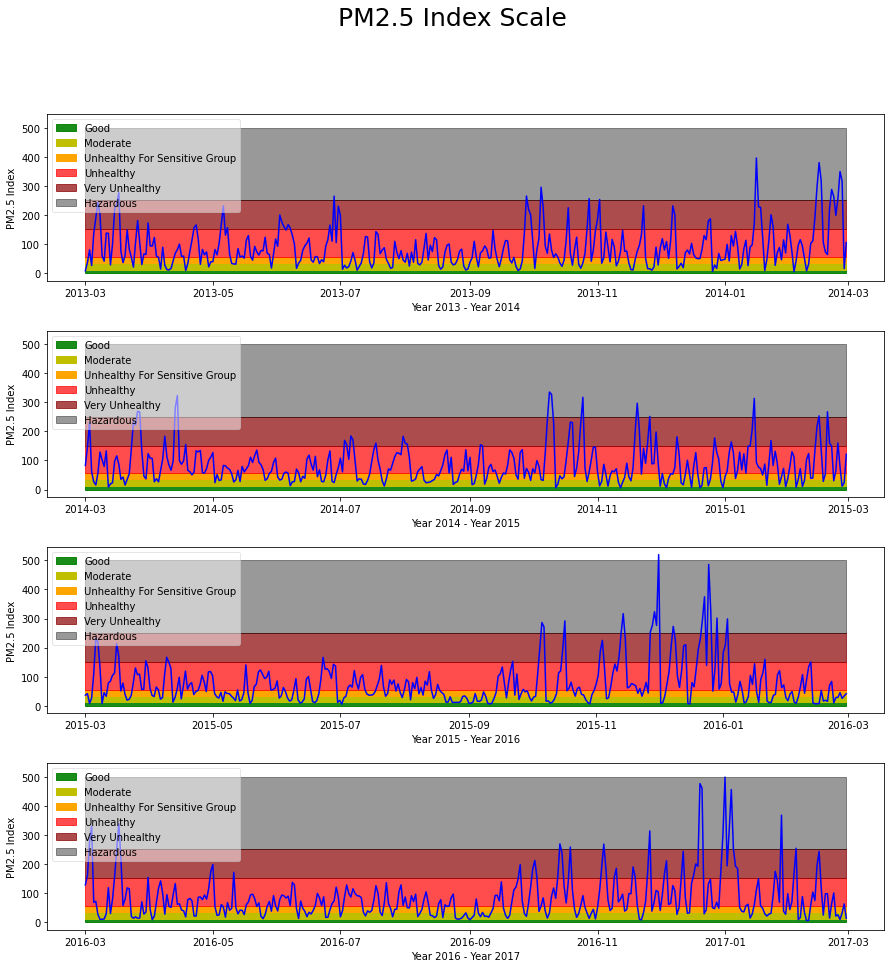

In [18]:
fig, axs = plt.subplots(4, sharey = True, figsize = (15, 15))
fig.suptitle('PM2.5 Index Scale', fontsize = 25)
fig.subplots_adjust(hspace = 0.3)
axs[0].plot(dataH['2013-03-01':'2014-02-28'], color = 'blue')
axs[1].plot(dataH['2014-03-01':'2015-02-28'], color = 'blue')
axs[2].plot(dataH['2015-03-01':'2016-02-29'], color = 'blue')
axs[3].plot(dataH['2016-03-01':'2017-02-28'], color = 'blue')

xdate0 = pd.date_range(start = "2013-03-01", end= "2014-02-28")
xdate1 = pd.date_range(start = '2014-03-01', end = '2015-02-28')
xdate2 = pd.date_range(start = '2015-03-01', end = '2016-02-29')
xdate3 = pd.date_range(start = '2016-03-01', end = '2017-02-28')

index_scale(0, xdate0)
index_scale(1, xdate1)
index_scale(2, xdate2)
index_scale(3, xdate3)


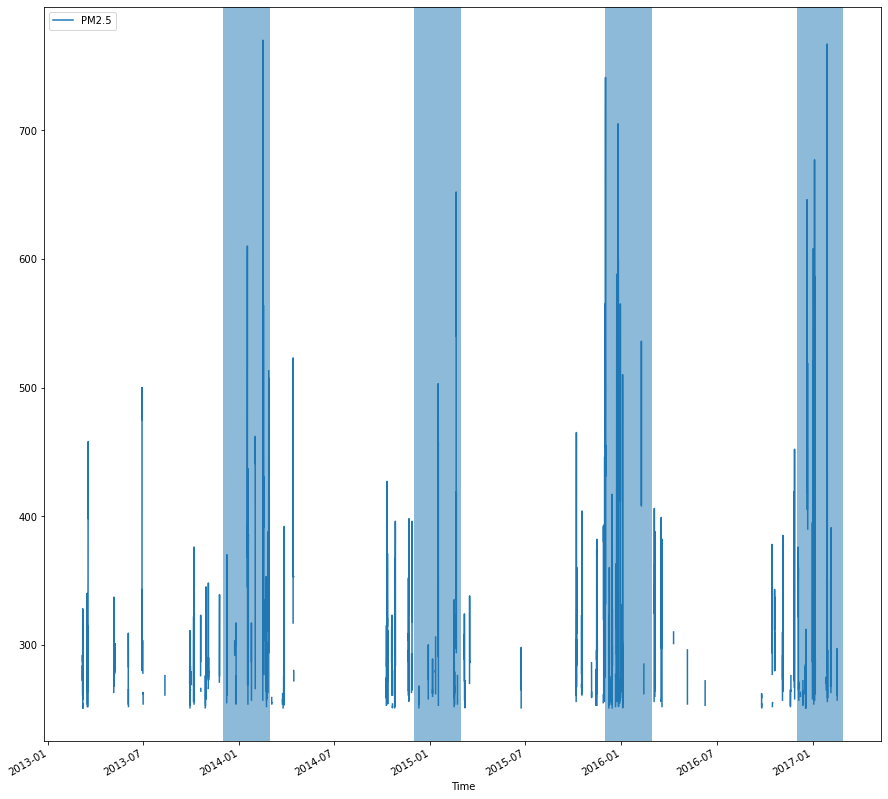

In [20]:
datadanger = data[data>250].sort_values(by = 'PM2.5', ascending = False)
datadanger.plot(figsize = (15, 15))
plt.axvspan(xmin = '2013-12-01', xmax = '2014-02-28', alpha = 0.5)
plt.axvspan(xmin = '2014-12-01', xmax = '2015-02-28', alpha = 0.5)
plt.axvspan(xmin = '2015-12-01', xmax = '2016-02-28', alpha = 0.5)
plt.axvspan(xmin = '2016-12-01', xmax = '2017-02-28', alpha = 0.5)

Notice the high PM2.5 values during the winter months of December, January, and February. This is due to the fact that the winter months are the coldest months in Gucheng area and the heating systems are turned on. The heating systems are powered by coal which is a major contributor to the high PM2.5 values.

In [22]:
df2 = pd.to_datetime(df[["year", "month", "day", "hour"]])
datad = pd.concat([df2, df[['PM2.5', 'TEMP']]], axis = 1)
datad = datad.rename(columns = {0: "Time", 'PM2.5': 'PM2.5', 'TEMP': 'TEMPERATURE'})
datad.set_index('Time', inplace = True)
datad.head()

,PM2.5,TEMPERATURE
Time,,
2013-03-01 00:00:00,6.0,0.1
2013-03-01 01:00:00,6.0,-0.3
2013-03-01 02:00:00,5.0,-0.7
2013-03-01 03:00:00,6.0,-1.0
2013-03-01 04:00:00,5.0,-1.3


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Temperature')]

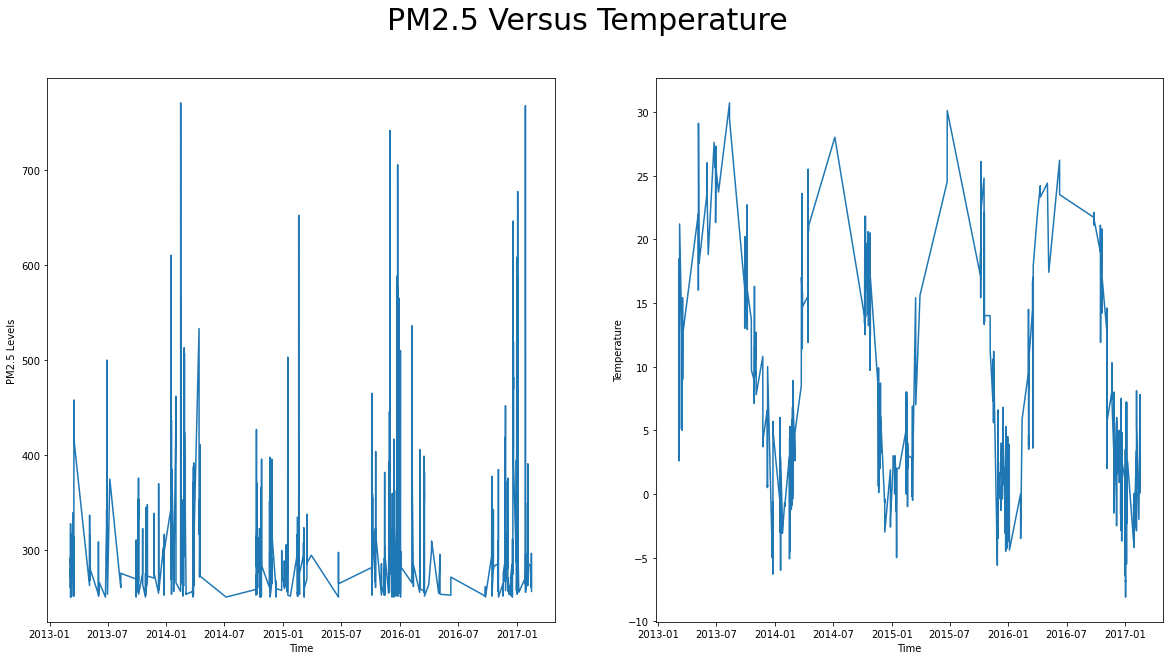

In [26]:
fig, axs = plt.subplots(1, 2, sharex = True, figsize = (20, 10))
fig.suptitle('PM2.5 Versus Temperature', size = 30)
axs[0].plot(datad[datad['PM2.5']>250]['PM2.5'])
axs[0].set(xlabel = ('Time'), ylabel = ('PM2.5 Levels'))
axs[1].plot(datad[datad['PM2.5']>250]['TEMPERATURE'])
axs[1].set(xlabel = ('Time'), ylabel = ('Temperature'))